In [ ]:
pip install --upgrade yfinance pandas_datareader


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting up visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data directly using yfinance
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Combine the data into a single DataFrame
company_list = [company_data['AAPL'], company_data['GOOG'], company_data['MSFT'], company_data['AMZN']]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, name in zip(company_list, company_name):
    company["company_name"] = name

# Concatenate all company data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Check the last 10 rows
print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-03  183.050003  183.440002  180.880005  181.960007  181.960007   
2024-10-04  185.750000  187.600006  183.600006  186.509995  186.509995   
2024-10-07  182.949997  183.600006  180.250000  180.800003  180.800003   
2024-10-08  181.919998  183.089996  180.919998  182.720001  182.720001   
2024-10-09  182.820007  185.850006  182.050003  185.169998  185.169998   
2024-10-10  187.130005  188.130005  185.830002  186.649994  186.649994   
2024-10-11  186.630005  189.929993  186.300003  188.820007  188.820007   
2024-10-14  189.779999  189.830002  187.360001  187.539993  187.539993   
2024-10-15  187.630005  188.410004  184.580002  187.690002  187.690002   
2024-10-16  187.050003  187.755997  186.130005  186.764999  186.764999   

              Volume company_name  
Date                               
2024-10-03  30204300       AMAZON  
202

In [ ]:
aapl_data = df[df["company_name"] == "APPLE"]
print(aapl_data.describe())


             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   196.400751  198.186482  194.726996  196.563123  196.153256   
std     20.805669   21.038141   20.395780   20.768184   20.963561   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    181.270004  182.759995  179.559998  181.419998  180.894348   
50%    190.899994  192.089996  189.580002  191.039993  190.586807   
75%    218.699997  220.380005  216.009995  218.360001  218.107544   
max    236.479996  237.490005  233.089996  234.820007  234.548523   

             Volume  
count  2.530000e+02  
mean   5.878542e+07  
std    3.010642e+07  
min    7.257334e+06  
25%    4.362750e+07  
50%    5.251700e+07  
75%    6.488540e+07  
max    3.186799e+08  


In [ ]:
aapl_data = df[df["company_name"] == "APPLE"]
print(aapl_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-10-16 to 2024-10-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
None


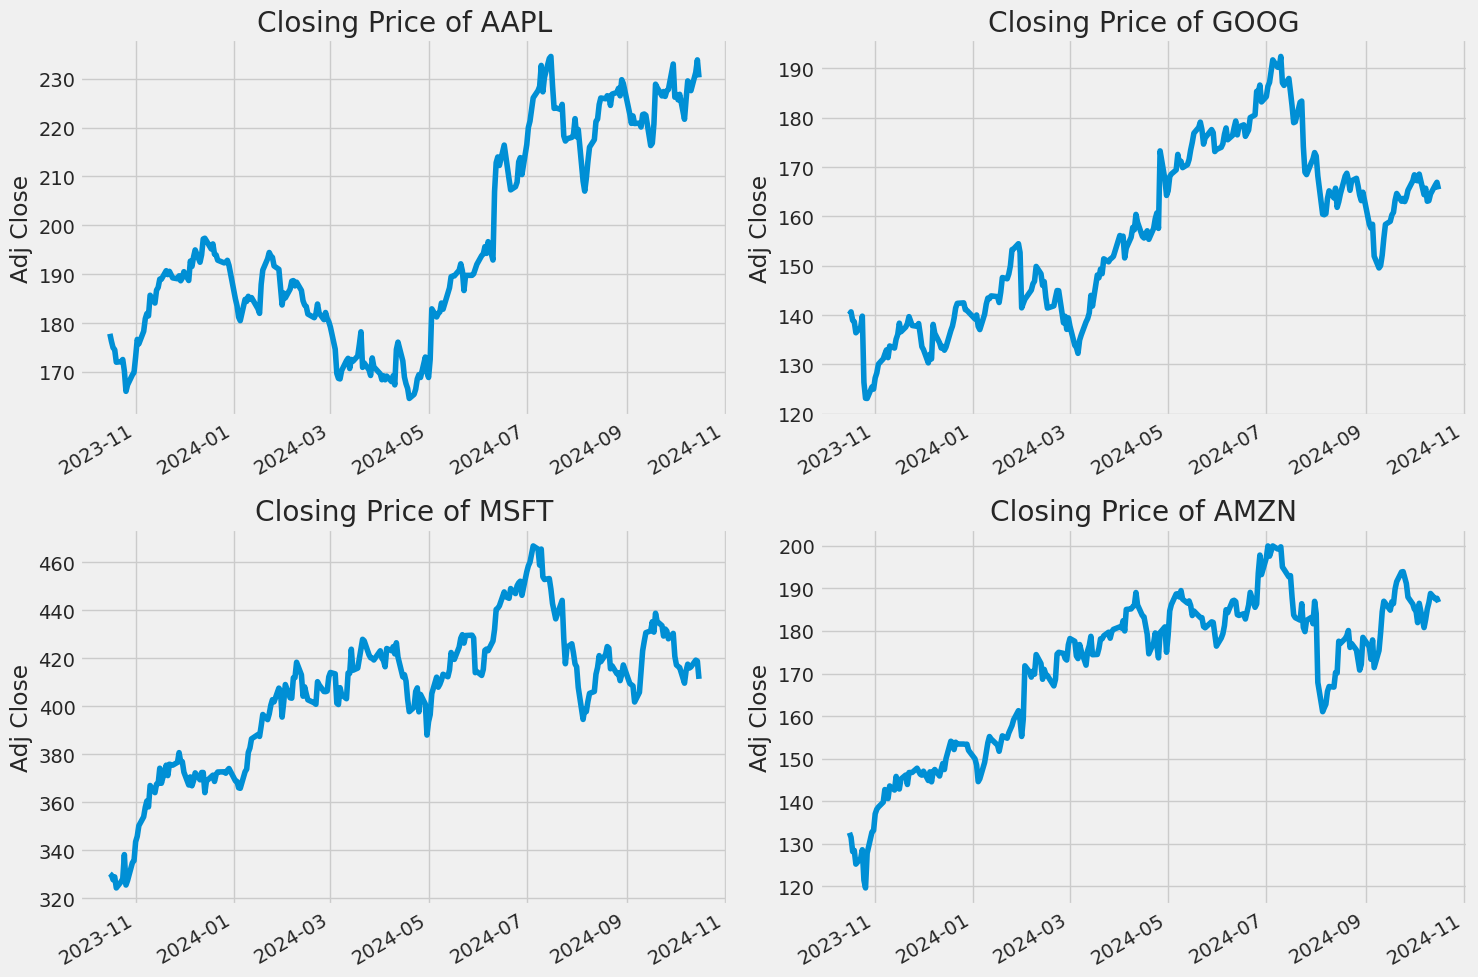

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

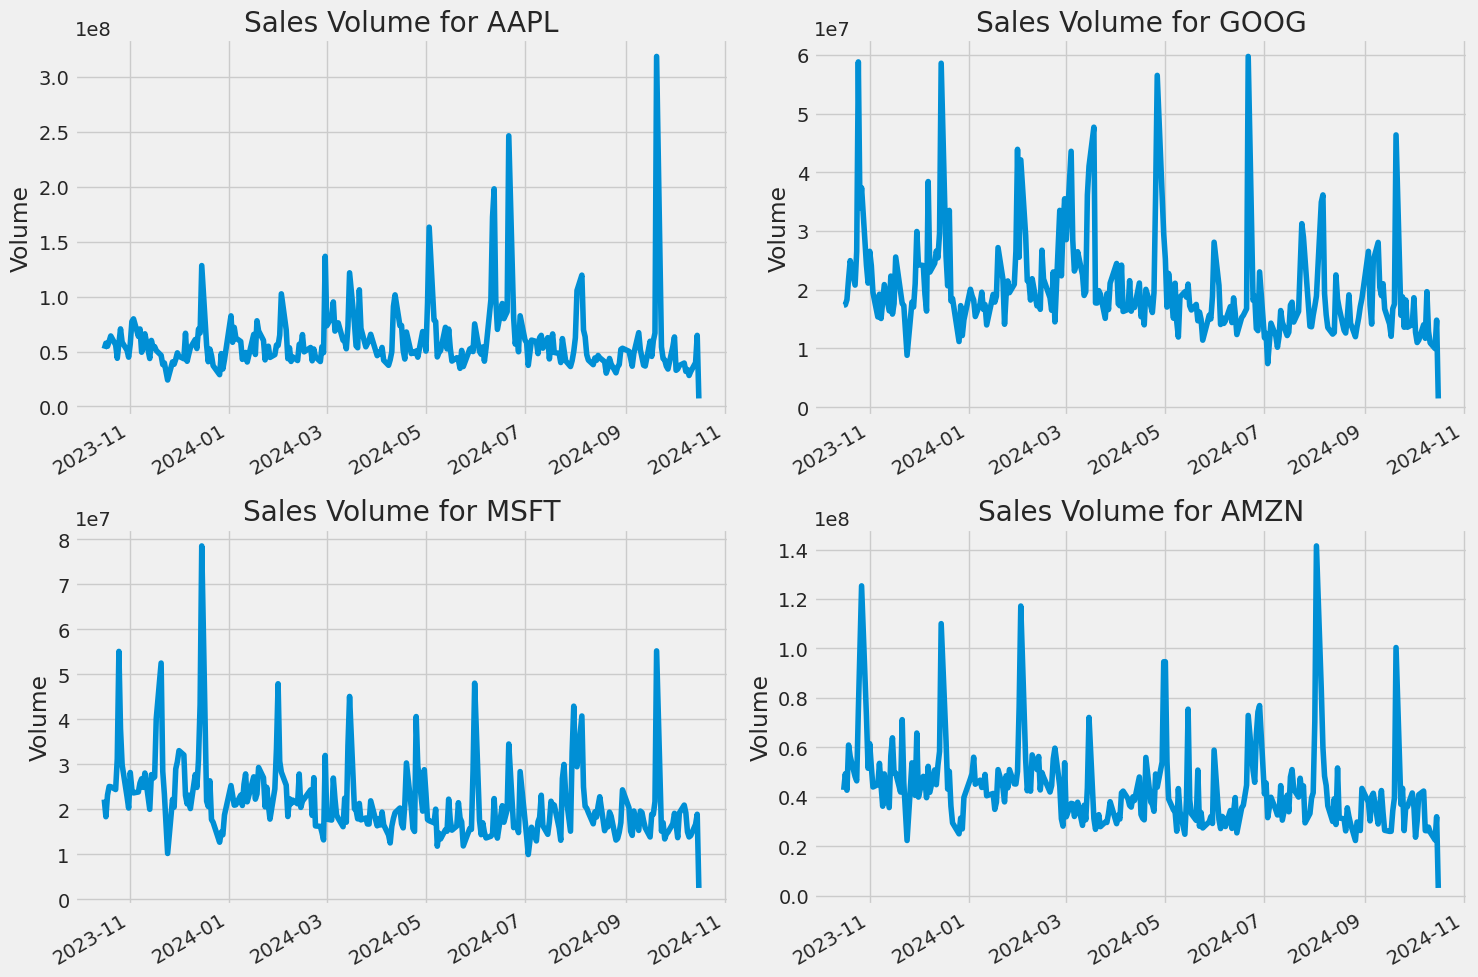

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


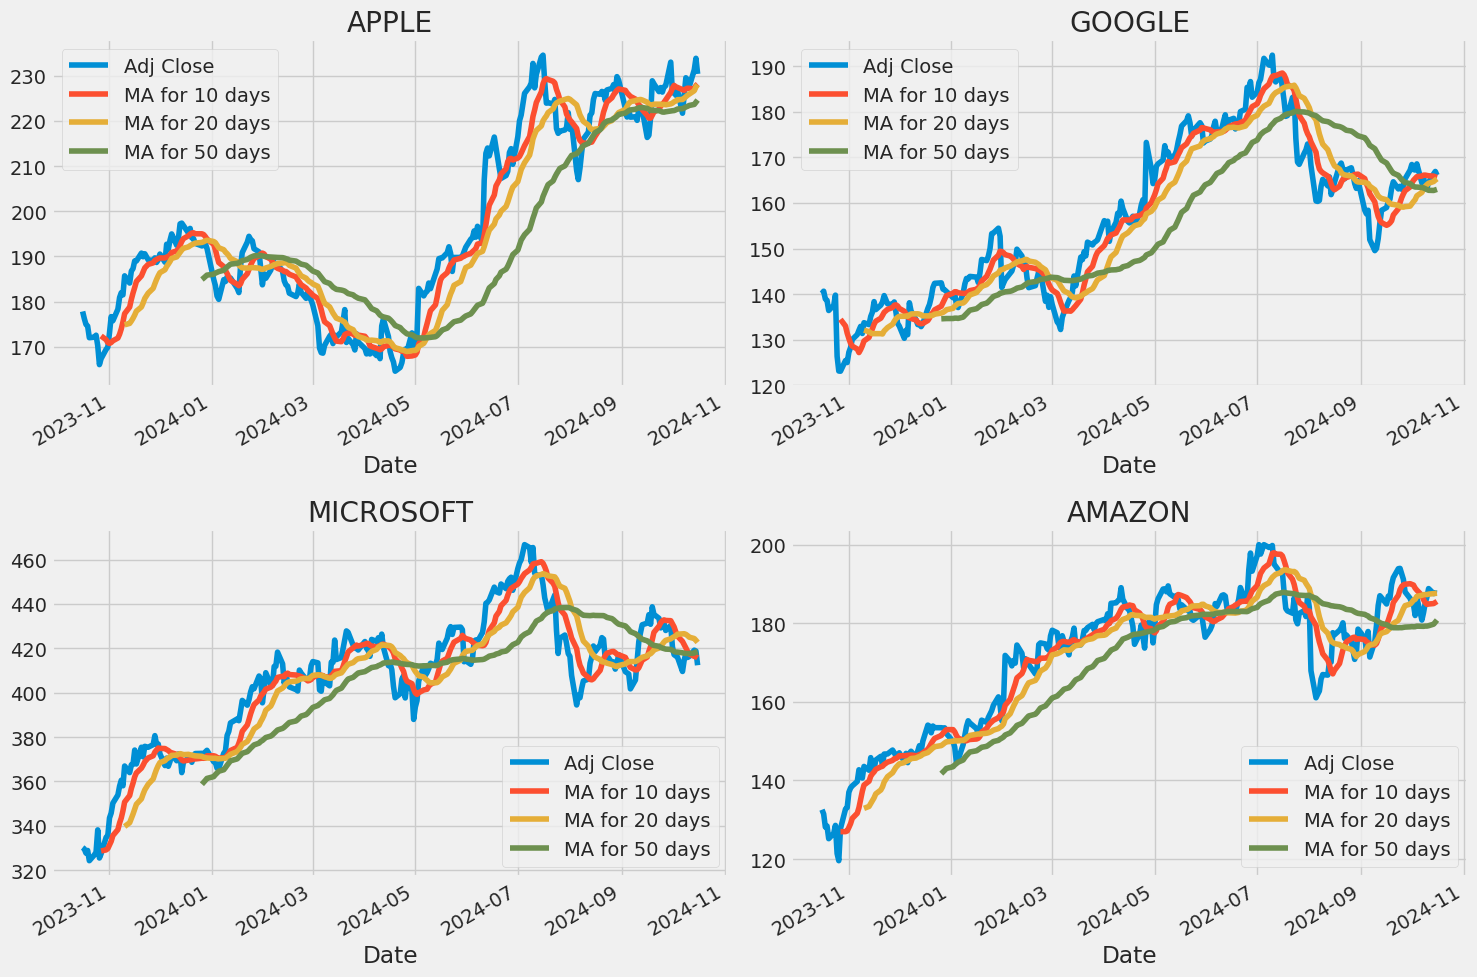

In [ ]:
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Moving Average Days
ma_day = [10, 20, 50]

# Add moving average columns to each company's data
for ma in ma_day:
    for stock in tech_list:
        column_name = f"MA for {ma} days"
        company_data[stock][column_name] = company_data[stock]['Adj Close'].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Apple
company_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Google
company_data['GOOG'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# Microsoft
company_data['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# Amazon
company_data['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


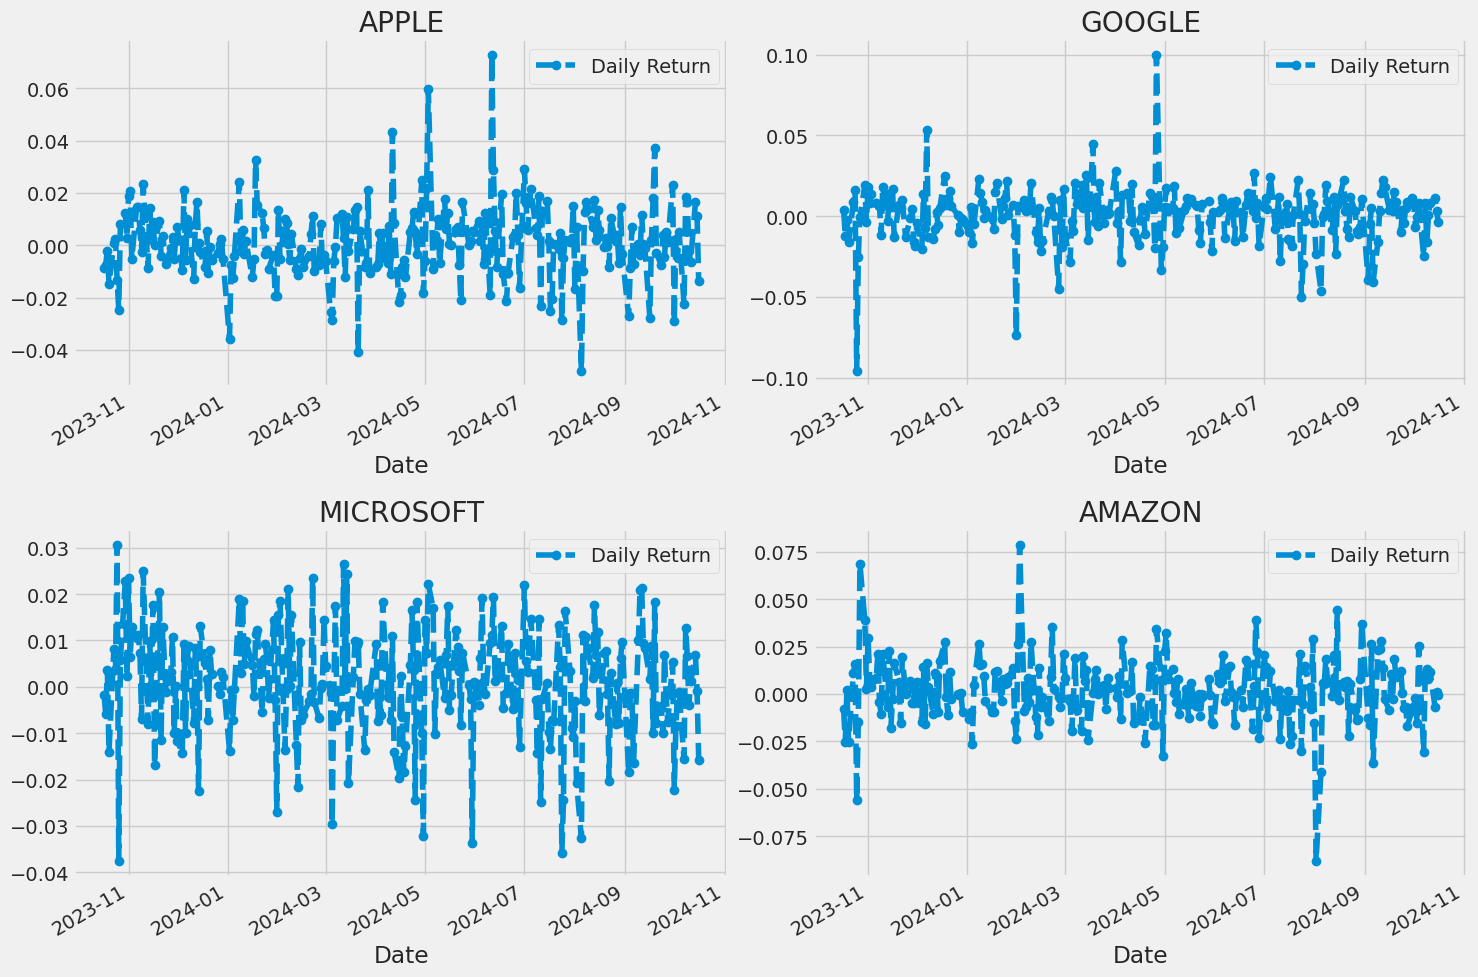

In [ ]:
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Calculate Daily Returns for each company
for company in company_data:
    company_data[company]['Daily Return'] = company_data[company]['Adj Close'].pct_change()

# Plotting the Daily Return for each company
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for Apple
company_data['AAPL']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

# Plot for Google
company_data['GOOG']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

# Plot for Microsoft
company_data['MSFT']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

# Plot for Amazon
company_data['AMZN']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

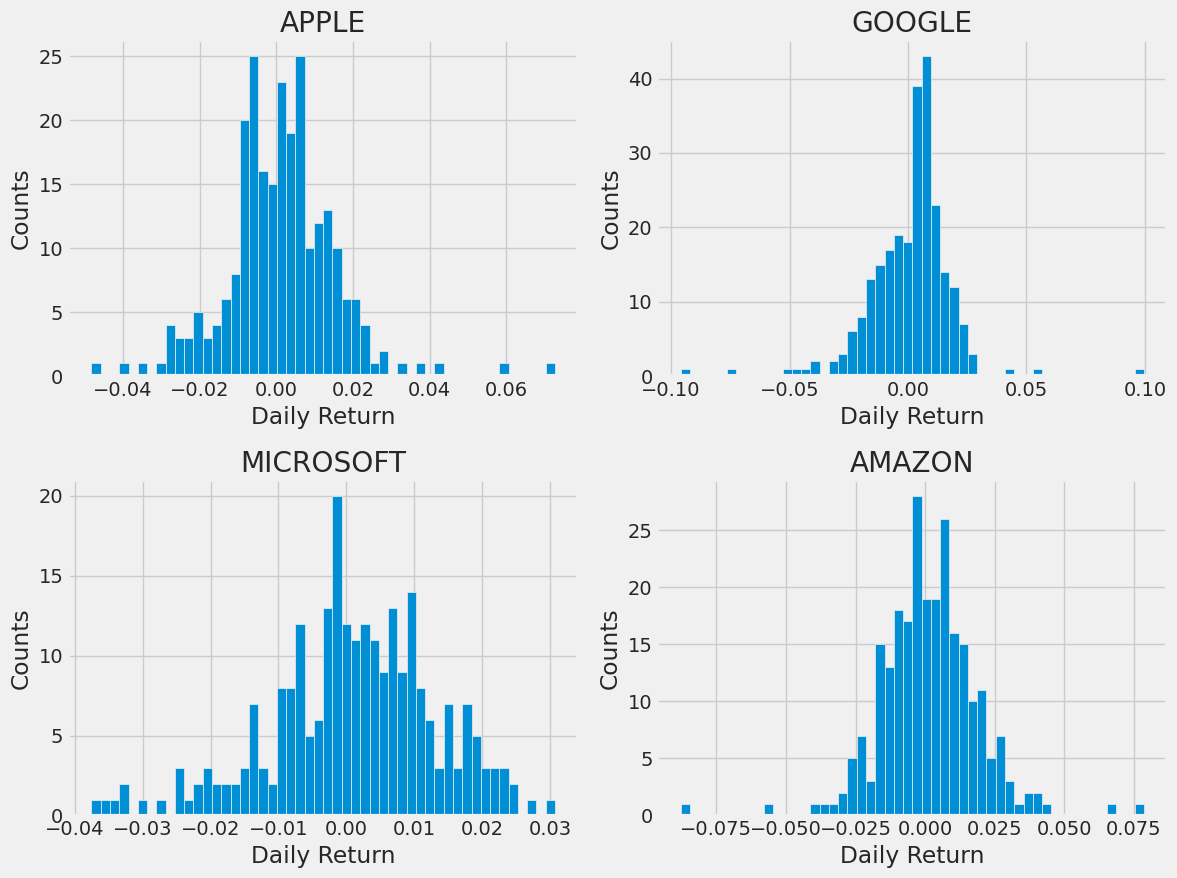

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()